Bitwise operators in opencv
--------------------
also thickness if its a positive value then it is thickness if -ve then it fills the entire area!! also remeber that we provide 255 color value  to white

In [11]:
import cv2 as cv
import numpy as np

In [2]:
blank = np.zeros((500,500),dtype = 'uint8')

rect = cv.rectangle(blank.copy(),(100,100),(400,400),255,-1)
cir = cv.circle(blank.copy(),(250,250),150,255,-1)

bit_and = cv.bitwise_and(rect,cir)
bit_not = cv.bitwise_not(rect,cir)
bit_or = cv.bitwise_or(rect,cir)
bit_xor = cv.bitwise_xor(rect,cir)
cv.imshow('and',bit_and)
cv.imshow('not',bit_not)
cv.imshow('or',bit_or)
cv.imshow('xor',bit_xor)

cv.waitKey(0)
cv.destroyAllWindows()

Masking -  it allows us to focus on our subject of interest

In [3]:
img = cv.imread('Documents/a.jpg')

In [4]:
masked = cv.bitwise_and(img,img,mask = bit_and)
cv.imshow('masking',masked)

cv.waitKey(0)
cv.destroyAllWindows()
#it will not work because masked tries to bitwise and with a grayscale image of circle hence dimension mismatch
#this is for using bitwise and as a filter for translating u  should use cv.circle simply

error: OpenCV(4.9.0) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [5]:
masked = cv.bitwise_and(img.BGR2GRAY,img.BGR2GRAY,mask = bit_and)
cv.imshow('masking',masked)

cv.waitKey(0)
cv.destroyAllWindows()
#its because img is nothing but a numpy array
#it will not work because masked tries to bitwise and with a grayscale image of circle hence dimension mismatch
#this is for using bitwise and as a filter for translating u  should use cv.circle simply

AttributeError: 'numpy.ndarray' object has no attribute 'BGR2GRAY'

In [6]:
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
masked = cv.bitwise_and(img,img,mask = bit_and)
cv.imshow('masking',masked)

cv.waitKey(0)
cv.destroyAllWindows()
#still error because dimension mismatch
#it will not work because masked tries to bitwise and with a grayscale image of circle hence dimension mismatch
#this is for using bitwise and as a filter for translating u  should use cv.circle simply

error: OpenCV(4.9.0) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [7]:
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
bit_and = cv.resize(bit_and,img.shape[-1:1:-1])
masked = cv.bitwise_and(img,img,mask = bit_and)
cv.imshow('masking',masked)

cv.waitKey(0)
cv.destroyAllWindows()
#error becuase img is already assigned to grayscale
#still error because dimension mismatch
#it will not work because masked tries to bitwise and with a grayscale image of circle hence dimension mismatch
#this is for using bitwise and as a filter for translating u  should use cv.circle simply

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [8]:
bit_and = cv.resize(bit_and,img.shape[::-1])
masked = cv.bitwise_and(img,img,mask = bit_and)
cv.imshow('masking',masked)

cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
rect  = cv.rectangle(blank.copy(),(100,100),(400,400),[255,0,0],-1)
cv.imshow('rectangle',rect)

cv.waitKey(0)
cv.destroyAllWindows()

Histogram plots for image intensity of BGR
---------------------------------


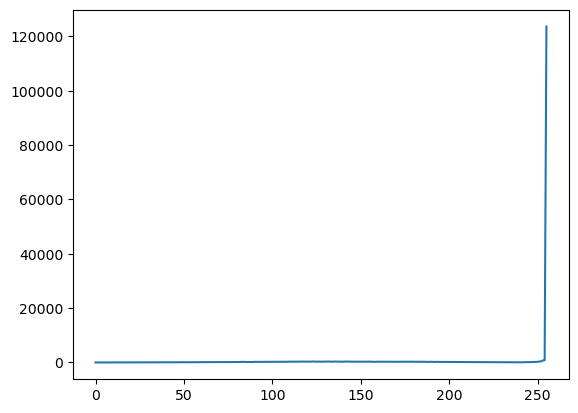

In [10]:
cimg = cv.imread('Documents/a.jpg')
import  matplotlib.pyplot as plt
a = cv.calcHist([cimg],[0],None,[256],[0,256])
plt.plot(a)
plt.show()

In [14]:
s_img = cv.imread('Documents/a.jpg')
#whenever we have to get a face detection or edge detection always use grayscale images
#no need to use images 
sg_img = cv.cvtColor(s_img,cv.COLOR_BGR2GRAY)
#(x,y) axis0 x and axisy as 1,0
sobelx = cv.Sobel(sg_img,cv.CV_64F,1,0)
sobely = cv.Sobel(sg_img,cv.CV_64F,0,1)

final_edge = cv.bitwise_or(sobelx,sobely)
cv.imshow('final',final_edge)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
s_img = cv.imread('Documents/a.jpg')
#whenever we have to get a face detection or edge detection always use grayscale images
#no need to use images 
sg_img = cv.cvtColor(s_img,cv.COLOR_BGR2GRAY)
lap_edge = cv.Laplacian(sg_img,cv.CV_64F)
lap_edge = np.uint8(np.absolute(lap_edge))
cv.imshow('final',lap_edge)
cv.waitKey(0)
cv.destroyAllWindows()
#thresholding,laplacian,eroding,dilating,sobel,etc..